In [5]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../track-a.csv")
data.head()
data.tail()
data.describe()

,anger,fear,joy,sadness,surprise
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.120303,0.582009,0.243497,0.317197,0.303107
std,0.325375,0.493318,0.429270,0.465469,0.459684
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#look at stuff
#find null values
data.isna().sum()
data.columns

Index(['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise'], dtype='object')

Anger count:
 333
Fear count:
 1611
Joy count:
 674
Sadness count:
 878
Surprise count:
 839


<BarContainer object of 5 artists>

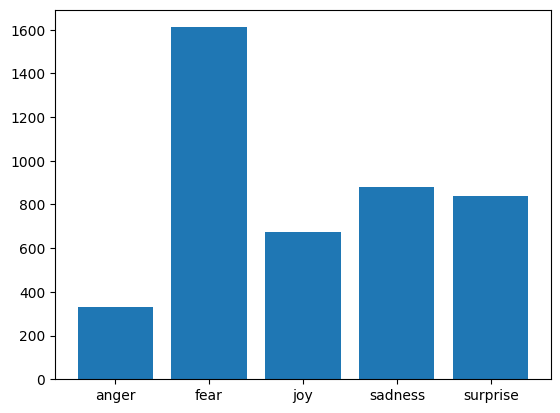

In [8]:

anger_count = data['anger'].sum()
fear_count = data['fear'].sum()
joy_count = data['joy'].sum()
sadness_count = data['sadness'].sum()
surprise_count = data['surprise'].sum()

print("Anger count:\n", anger_count)
print("Fear count:\n", fear_count)
print("Joy count:\n", joy_count)
print("Sadness count:\n", sadness_count)
print("Surprise count:\n", surprise_count)

#plot the counts    
plt.bar(['anger', 'fear', 'joy', 'sadness', 'surprise'], 
        [anger_count, fear_count, joy_count, sadness_count, surprise_count])



Fear is most common, followed by  sadness and surprise.

In [11]:
#different combinations of emotions
data.groupby(['anger', 'fear', 'joy', 'sadness', 'surprise']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,anger,fear,joy,sadness,surprise,counts
4,0,0,1,0,0,429
10,0,1,0,1,0,412
8,0,1,0,0,0,411
9,0,1,0,0,1,324
0,0,0,0,0,0,239
2,0,0,0,1,0,133
11,0,1,0,1,1,124
1,0,0,0,0,1,114
5,0,0,1,0,1,108
24,1,1,0,1,0,77


In [ ]:
#most common is only joy, followed by fear and surprise